<a href="https://colab.research.google.com/github/helenabarmer/machine_learning_intro/blob/master/employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification for recruiters**

### Binary Classification
In binary classification we are looking for a yes or no / true or false answer from the machine. In this case we would like to ask if the candidate we are recruiting will be staying long term at our company.

### Use Case
We are recruiting new people for our different departments. To save time we are using a machine learning model to help us answer if the candidate will be a long term fit for our company or not. We will use previous information from our employees.

### Dataset
For this task we are using IBM:s dataset HR Employee Attrition.
You can find and download the dataset [here](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset).



**This will be our workflow:**
1. Prepare and explore our dataset
2. Define our machine learning model
3. Do the training of our machine learning model
4. Evaluate results of our machine learning model
5. Use our model to classify our question

We will start with importing all the libraries we need for our workflow:

In [1]:
# Import all libraries needed
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

print('All libraries imported. ')

All libraries imported. 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Preparing and exploring our data

In [2]:
# Upload the dataset to Google drive, or use the raw format of the dataset:
# data = 'data = 'https://raw.githubusercontent.com/helenabarmer/machine_learning_intro/master/Binary%20Classification/WA_Fn-UseC_-HR-Employee-Attrition.csv'
data = '/content/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(data)
print('Dataset loaded')

Dataset loaded


We will now start to explore our data and have a look at:
*   First 5 rows
*   Last 5 rows
*   The shape of our data in the format rows and columns
* The name of all the columns
* See total columns
* Check if we can find any null values in our data
* See the divide between people who have stayed and people who have left the company




In [ ]:
# First 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Last 5 rows, shows us how many datarows we have
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [ ]:
# Rows, columns
df.shape

(1470, 35)

In [ ]:
# Column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# See how many columns we have
print(f'There are {len(df.columns)} columns in the dataset')

There are 35 columns in the dataset


In [ ]:
# See if there are any null values in our data
is_null = df.columns[df.isnull().any()].tolist()

if(is_null == []):
  print('There are no missing values in our data')
else:
  print(f'Missing values in our data = {is_null}')

There are no missing values in our data


In [ ]:
# See how many has left vs stayed at the company
attrition = df.Attrition.value_counts() / len(df) * 100
no = int(round(attrition[0]))
yes = int(round(attrition[1]))

print(f'{no} % has stayed with the company')
print(f'{yes} % has left the company')

84 % has stayed with the company
16 % has left the company


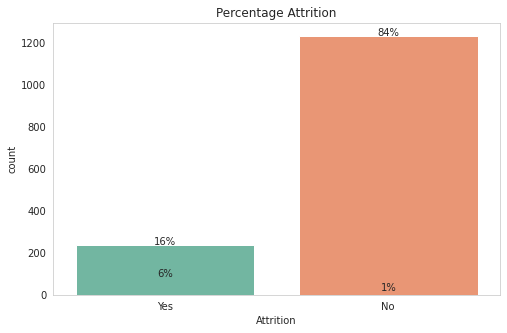

In [ ]:
# Visualisation of the attrition
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title("Percentage Attrition")

ax = (df.Attrition.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)

df_len = int(len(df))

sns.countplot(x ='Attrition', data = df, palette = "Set2")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:0.0f}%'.format(height/df_len*100),
            ha="center") 
    

## Attrition summary

Looking at the summary below we will see the average statistics of people staying vs not staying at the company.

In the average these people tend to leave the company (compared to those who stay):
* Younger people around 33 years of age, we can also see this in the visualization below
* Lower job level than people who tend to stay
* Less monthly income
* Less stock option level
* Fewer total working years
* Less years in the current role
* Less time with their current manager

In [ ]:
# Overview of summary (staying vs not staying at the company)
attrition_summary = df.groupby('Attrition')
attrition_summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


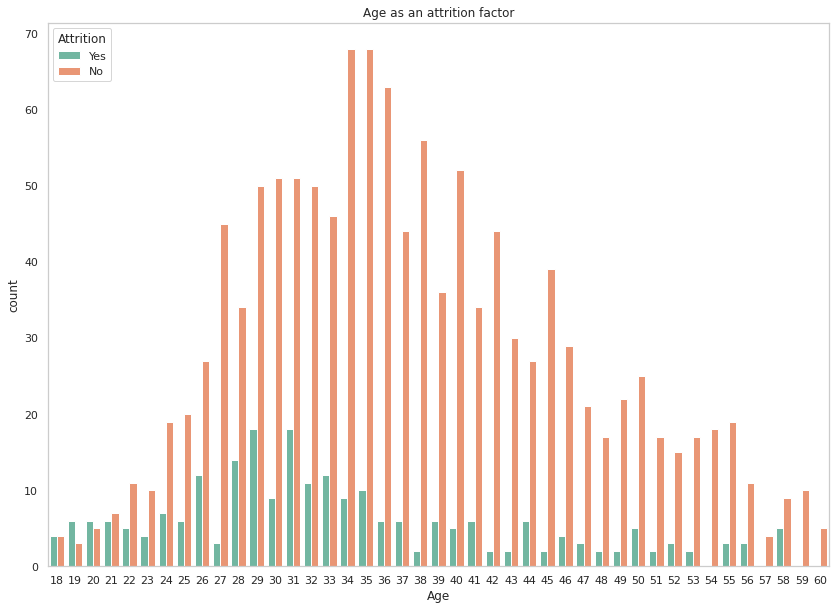

In [ ]:
# Plot attrition vs age
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title("Age as an attrition factor")

sns.countplot(x ='Age', hue='Attrition', data = df, palette = "Set2");

# Correlations

We will now create a heatmap to see correlations in our data.

At a first glance moste values seems weekly correlated.


* positive(+) correlation: One example is total working years correlated with job level (when you work at a company for a longer time you will have the possibility to advance)
* neagtive(-) correlation: Number of years someone has worked on the company has a negative correlation with numbers of companies worked.

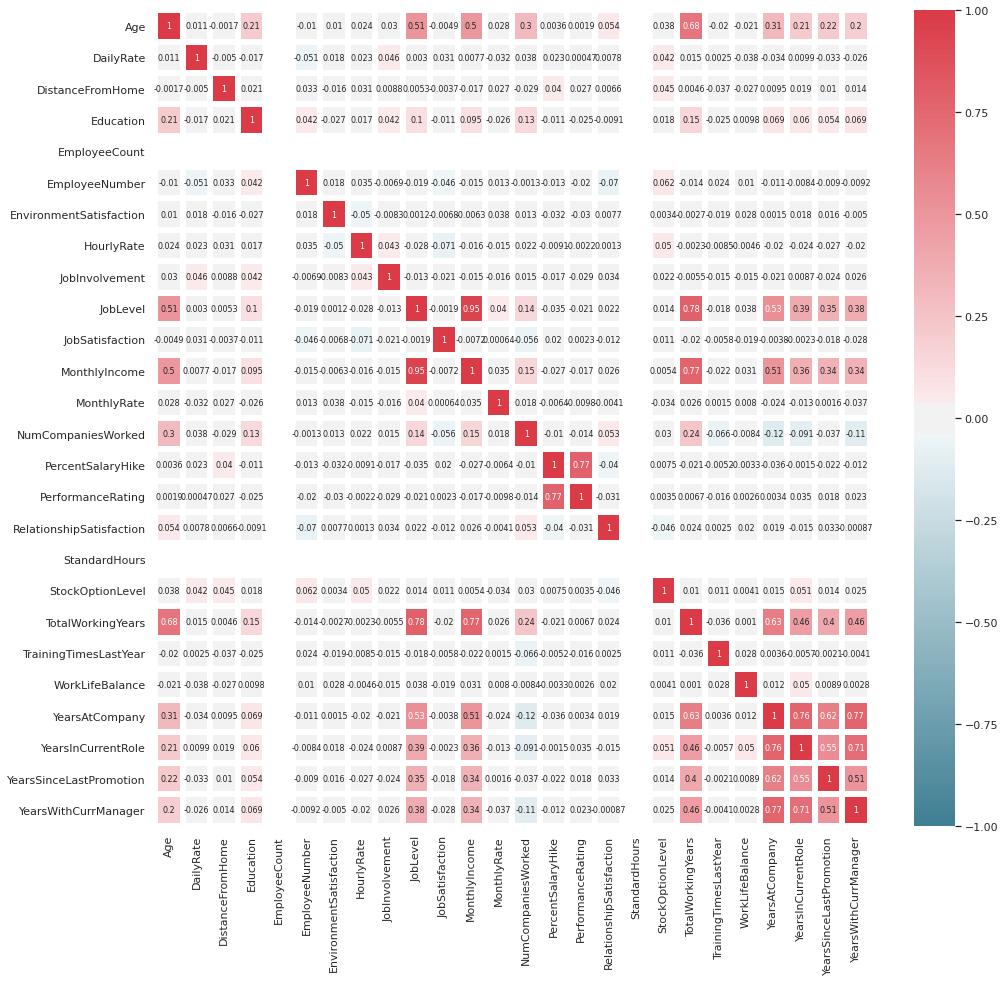

In [ ]:
fig, ax = plt.subplots(figsize=(16, 15))
corr = df.corr()
ax =sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, linewidths=5, 
            vmin=-1, vmax=1, annot_kws={'size': "8"})
plt.show()


## Descriptive Statistics

Statistics will help us describe our data and make it more meaningful.

We will see what is central to out dataset and also how spread out or data is.

It is also important for us to know the type of our data so we know how we can change it to use it. The machine only understands numbers and will not be able to process non numerical values.


In [ ]:
# See the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Our unique values for every column name
columns = df.columns.tolist()
for i in columns:
  print(i + " = " + str(len(df[i].unique())))

Age = 43
Attrition = 2
BusinessTravel = 3
DailyRate = 886
Department = 3
DistanceFromHome = 29
Education = 5
EducationField = 6
EmployeeCount = 1
EmployeeNumber = 1470
EnvironmentSatisfaction = 4
Gender = 2
HourlyRate = 71
JobInvolvement = 4
JobLevel = 5
JobRole = 9
JobSatisfaction = 4
MaritalStatus = 3
MonthlyIncome = 1349
MonthlyRate = 1427
NumCompaniesWorked = 10
Over18 = 1
OverTime = 2
PercentSalaryHike = 15
PerformanceRating = 2
RelationshipSatisfaction = 4
StandardHours = 1
StockOptionLevel = 4
TotalWorkingYears = 40
TrainingTimesLastYear = 7
WorkLifeBalance = 4
YearsAtCompany = 37
YearsInCurrentRole = 19
YearsSinceLastPromotion = 16
YearsWithCurrManager = 18


In [ ]:
# Statistical overview
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Preparing our data further

We will now drop columns that we have decided we do not need for our machine learning model.


In [ ]:
# Shape before dropping values
print(f'Shape of our dataset before dropping columns: \nRows:{df.shape[0]} \nColumns: {df.shape[1]}')

Shape of our dataset before dropping columns: 
Rows:1470 
Columns: 35


In [3]:
# Dropping columns in our dataframe
df.drop('EmployeeCount', 
             axis = 1, 
             inplace = True)
df.drop('StandardHours', 
             axis = 1, 
             inplace = True) 
df.drop('EmployeeNumber', 
             axis = 1,  
             inplace = True) 
df.drop('Over18',  
             axis = 1, 
             inplace = True) 
df.drop('JobInvolvement',  
             axis = 1, 
             inplace = True) 
df.drop('DailyRate',  
             axis = 1, 
             inplace = True) 
df.drop('EnvironmentSatisfaction',  
             axis = 1, 
             inplace = True) 
df.drop('JobSatisfaction',  
             axis = 1, 
             inplace = True) 
df.drop('MonthlyIncome',  
             axis = 1, 
             inplace = True) 
df.drop('MonthlyRate',  
             axis = 1, 
             inplace = True) 
df.drop('PercentSalaryHike',  
             axis = 1, 
             inplace = True) 
df.drop('PerformanceRating',  
             axis = 1, 
             inplace = True) 
df.drop('RelationshipSatisfaction',  
             axis = 1, 
             inplace = True) 
df.drop('StockOptionLevel',  
             axis = 1, 
             inplace = True) 
df.drop('TrainingTimesLastYear',  
             axis = 1, 
             inplace = True) 
df.drop('YearsAtCompany',  
             axis = 1, 
             inplace = True) 
df.drop('YearsInCurrentRole',  
             axis = 1, 
             inplace = True) 
df.drop('YearsSinceLastPromotion',  
             axis = 1, 
             inplace = True) 
df.drop('YearsWithCurrManager',  
             axis = 1, 
             inplace = True) 
df.drop('OverTime',  
             axis = 1, 
             inplace = True) 
df.drop('JobRole',  
             axis = 1, 
             inplace = True) 

In [ ]:
# Shape after dropping values
print(f'Shape of our dataset after dropping columns: \nRows:{df.shape[0]} \nColumns: {df.shape[1]}')

Shape of our dataset after dropping columns: 
Rows:1470 
Columns: 14


We now have 14 columns instead of 35, let's examine that we got the right ones.

In [ ]:
# Checking our columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'HourlyRate', 'JobLevel',
       'MaritalStatus', 'NumCompaniesWorked', 'TotalWorkingYears',
       'WorkLifeBalance'],
      dtype='object')

In [ ]:
# First 5 rows of our dataframe
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobLevel,MaritalStatus,NumCompaniesWorked,TotalWorkingYears,WorkLifeBalance
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,Female,94,2,Single,8,8,1
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,Male,61,2,Married,1,10,3
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,Male,92,1,Single,6,7,3
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,Female,56,1,Married,1,8,3
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,Male,40,1,Married,9,6,3


We need to prepare our data to be proceed by our model. Before doing this we need to re-shape our categorical data into numbers.
Below we will see Dtype, we will then go ahead and extract the categorical data to make it numerical.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 1470 non-null   int64 
 1   Attrition           1470 non-null   object
 2   BusinessTravel      1470 non-null   object
 3   Department          1470 non-null   object
 4   DistanceFromHome    1470 non-null   int64 
 5   Education           1470 non-null   int64 
 6   EducationField      1470 non-null   object
 7   Gender              1470 non-null   object
 8   HourlyRate          1470 non-null   int64 
 9   JobLevel            1470 non-null   int64 
 10  MaritalStatus       1470 non-null   object
 11  NumCompaniesWorked  1470 non-null   int64 
 12  TotalWorkingYears   1470 non-null   int64 
 13  WorkLifeBalance     1470 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 160.9+ KB


In [4]:
# Saving a new dataframe with a copy from our df, extracting Dtype object (categorical)
df_categorical = df[['Attrition','BusinessTravel','Department',
                       'EducationField','Gender',
                       'MaritalStatus']].copy()

df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   MaritalStatus   1470 non-null   object
dtypes: object(6)
memory usage: 69.0+ KB


# Replace categorical values with numbers

We can replace the categorical values manually:
`yes_no = {'Yes': 1, 'No': 0}`

**One-Hot encoding**
When using one-hot encoding, we replace the categorical values with a 1 or 0 (true or false). We will do this with the pandas method `get_dummies()`.

In [5]:
# Replacing the categorical values manually
yes_no = {'Yes': 1, 'No': 0}
df_categorical['Attrition'] = df_categorical['Attrition'].apply(lambda x: yes_no[x])

df_categorical.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,MaritalStatus
0,1,Travel_Rarely,Sales,Life Sciences,Female,Single
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Married
2,1,Travel_Rarely,Research & Development,Other,Male,Single
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Married
4,0,Travel_Rarely,Research & Development,Medical,Male,Married


In [6]:
# One-hot encoding
df_categorical = pd.get_dummies(df_categorical)
df_categorical.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
2,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0


We will extract all the numerical values from the df we already had, and make a copy of this. Then we will concat df_categorical and df_numerical and have a new dataframe with only numerical values.

In [7]:
# Numerical features in our dataframe
df_numerical = df[['Age', 'DistanceFromHome', 'Education', 'HourlyRate', 'JobLevel',
'NumCompaniesWorked', 'TotalWorkingYears', 'WorkLifeBalance']].copy()

In [8]:
# Joining the 2 dataframes into one with concat
df_concat = pd.concat([df_categorical, df_numerical, ], axis=1)

Now when we have merged our two dataframes, we will have a look to see if all the values are numerical.

In [ ]:
# See first 5 rows
df_concat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Age,DistanceFromHome,Education,HourlyRate,JobLevel,NumCompaniesWorked,TotalWorkingYears,WorkLifeBalance
0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,41,1,2,94,2,8,8,1
1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,49,8,1,61,2,1,10,3
2,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,37,2,2,92,1,6,7,3
3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,33,3,4,56,1,1,8,3
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,27,2,1,40,1,9,6,3


In [ ]:
# Checking the Dtypes 
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition                          1470 non-null   int64
 1   BusinessTravel_Non-Travel          1470 non-null   uint8
 2   BusinessTravel_Travel_Frequently   1470 non-null   uint8
 3   BusinessTravel_Travel_Rarely       1470 non-null   uint8
 4   Department_Human Resources         1470 non-null   uint8
 5   Department_Research & Development  1470 non-null   uint8
 6   Department_Sales                   1470 non-null   uint8
 7   EducationField_Human Resources     1470 non-null   uint8
 8   EducationField_Life Sciences       1470 non-null   uint8
 9   EducationField_Marketing           1470 non-null   uint8
 10  EducationField_Medical             1470 non-null   uint8
 11  EducationField_Other               1470 non-null   uint8
 12  EducationField_Techn

Now we have our dataset processed and we can move to the next step and start defining our machine learning model.

## Defining our machine learning model

We will use Random Forest Classifier and compare it to K-Nearest Neighbor (KNN).
We will start out with the Random Forest Classifier and then move to KNN.

**Random Forest Classification** 
* Supervised learning algorithm
* Good indicator of feature importance
* Made up from many decision trees
* Get's prediction from the best solution and voting of decision trees
* Does not overfit

**K-Nearest Neighbor (KNN)**
* Implementing the k-nearest neighbors vote
* Uses the entire dataset in its training phase
* Does not make any underlying assumptions about the distribution of data
* Important to have the right k-value to avoid overfitting and underfitting of the datase


### **Random Forest Classification** 

In [9]:
# Import sklearn and machine learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [10]:
# Predict function for rf
def rf_predict(x):
  prediction = rf_model.predict(x)
  return prediction

The dataset will be divided into a 75% training size and 25% test size. Random state will be set to 42 as we want to keep the same split.

In [12]:
# We will re-shape the features and target to arrays
#features = df_concat.iloc[:, 1:df_concat.shape[1]].values
#target = df_concat.iloc[:, 0].values

# Setting our target and adding the features
rf_target = df_concat['Attrition'].values
rf_features = df_concat.drop('Attrition', axis = 1).values

# Create train and test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(rf_features, rf_target, test_size=0.25, random_state=42)

# Create our model and start training
rf_model = RandomForestClassifier()
rf_model.fit(X_train_rf, y_train_rf)

# Predict and see prediction on our test set
predict_X_test_rf= rf_predict(X_test_rf)

# Check the accuracy comparing our test values to true values
rf_acc = accuracy_score(y_test_rf, predict_X_test_rf)

print(f'Accuracy: {int(round(rf_acc*100))}%')

Accuracy: 87%


## Feature importance

To see which factors contributed to attrition we will visualize the 5 top reasons that affect this.

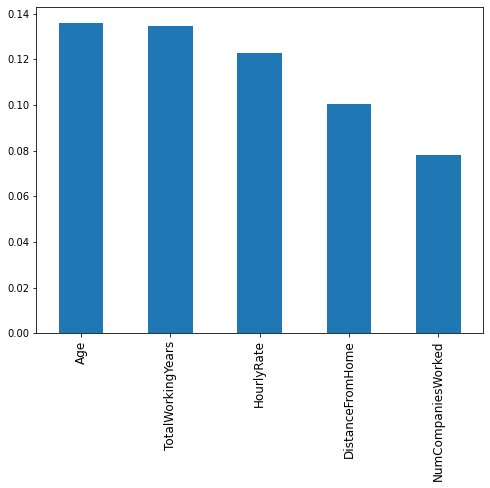

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index=rf_features.columns)

# Show 5 most contributing factors to attrition
feature_importance = feature_importance.nlargest(5)

plt.xticks(fontsize=12)

feature_importance.plot(kind='bar', figsize = (8, 6));


Looking at the bar above we can see that age, the hourly rate, total working years, distance from home and number of companies previously worked at are top contributing factors to attrition.

**We will test our data with one sample**

We have a new applicant who will answer the following questions:
* Would the applicant be open to travel? (No, frequently, rarely)
* Department applicant is joining (HR, Research&Development, Sales)
* Educational field (HR, life sciences, marketing, medical, other, technical)
* Gender (female, male)
* Martial status (divorced, married, single)
* Age
* How long will the applicant commute 
* Educational  level (1, 2, 3, 4)
* Hourly rate proposed
* Initial job level (1, 2, 3, 4, 5)
* Number of companies worked at previously
* Total years of working
* Regular work/life balance (1, 2, 3)

**Our new applicant:**
* Would not like to travel.
* Applying for the sales department
* Educational field: Other
* Female
* Single
* 28 years of age
* Live close to the working place
* Low educational level
* Wants 80 as an hourly rate
* Has some previous experience (job level)
* Has worked at 1 previous company
* Total 8 years of working
* Work life balance middle

In [16]:
# Adding our new applicant
new_applicant = np.array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 28, 2, 2, 80, 3, 1, 8, 2])
 
# The type is a list, so we need to re-shape it into a 2D array
type(new_applicant)
new_applicant

array([ 1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  1,
       28,  2,  2, 80,  3,  1,  8,  2])

In [17]:
# Re-shaping our list to a 2D array
new_applicant = np.reshape(new_applicant, (-1, 25))
new_applicant

array([[ 1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,
         1, 28,  2,  2, 80,  3,  1,  8,  2]])

In [18]:
predict_new_applicant = rf_predict(new_applicant)

if(predict_new_applicant == 0):
  print(f'This person seems to be a good fit for the company\nOutput: {predict_new_applicant}')
else:
  print('This person might not be a good fit for the company.\nOutput: {predict_new_applicant}')

This person seems to be a good fit for the company
Output: [0]


Our new applicant seems to be a good fit for the company so we will go ahead with the recruiting process.

### **K-Nearest Neighbor (KNN)**

In [13]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier

# Predict function for knn
def knn_predict(x):
  prediction = knn.predict(x)
  return prediction

In [14]:
# Setting our target and adding the features
knn_target = df_concat['Attrition'].values
knn_features = df_concat.drop('Attrition', axis = 1).values

# Create train and test set
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(knn_features, knn_target, test_size=0.20, random_state=42)

#Create KNN Classifier and set number of neigbors
knn = KNeighborsClassifier(n_neighbors=5)

# Trainig phase
knn.fit(X_train_knn, y_train_knn)

# Predict on the test set
prediction_X_test_knn = knn_predict(X_test_knn)

# Check the accuracy comparing our test values to true values
acc = accuracy_score(y_test_knn, prediction_X_test_knn)

print(f'Accuracy: {int(round(acc*100))}%')

Accuracy: 87%


In [19]:
# Test our applicant through the knn model
knn_new_applicant = knn_predict(new_applicant)

if(knn_new_applicant == 0):
  print(f'This person seems to be a good fit for the company\nOutput: {knn_new_applicant}')
else:
  print('This person might not be a good fit for the company.\nOutput: {predict_new_applicant}')

This person seems to be a good fit for the company
Output: [0]


We get the same result with our knn model as we did with our rf model.

### Confusion matrix


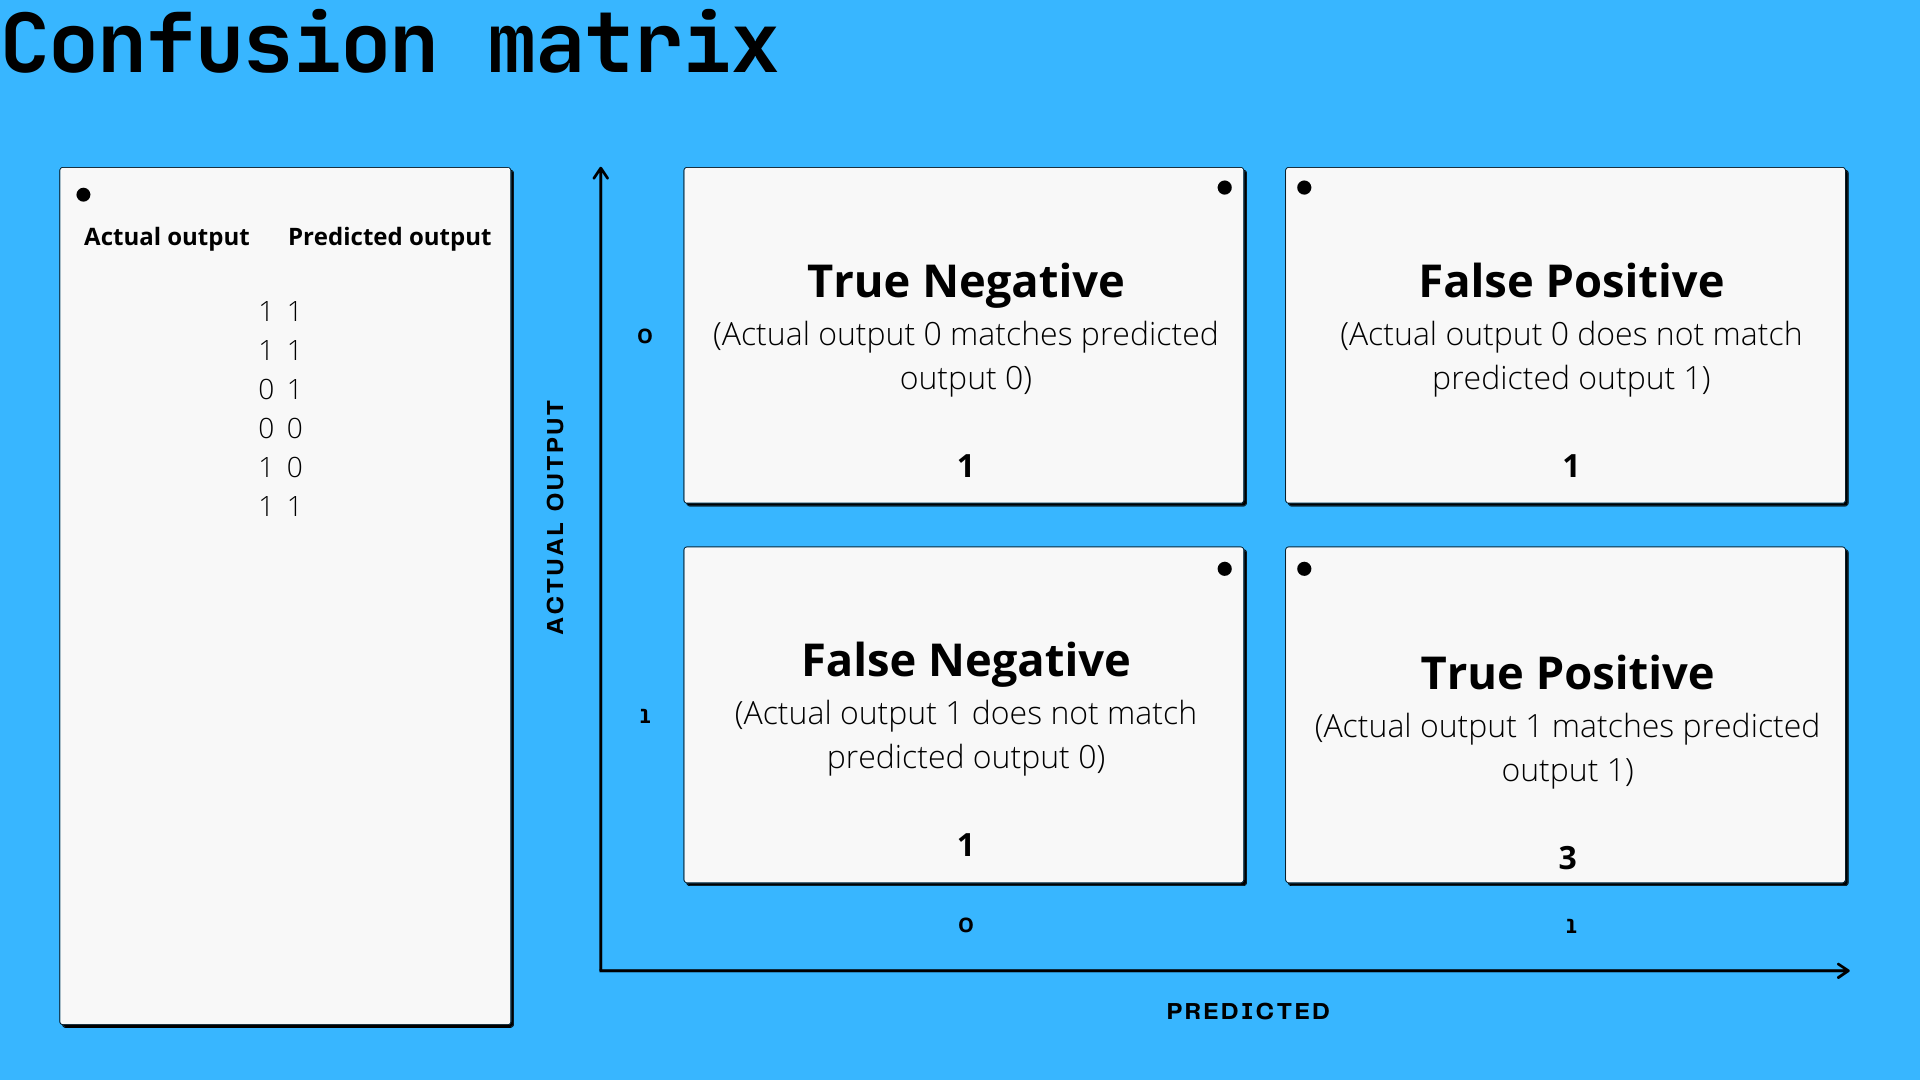

In [20]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test_knn, prediction_X_test_knn)
cf_matrix

array([[250,   5],
       [ 33,   6]])

We will visualize our confusion matrix to make it more clear.

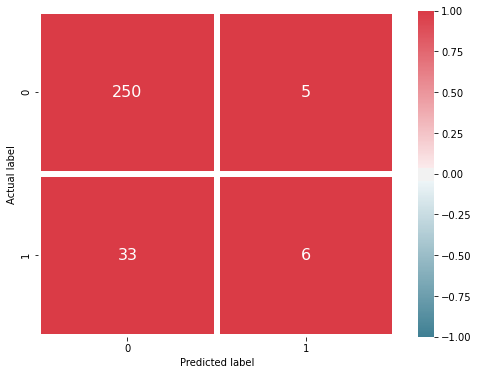

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cf_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True,
            linewidths=5, fmt='g',
            vmin=-1, vmax=1, annot_kws={'size': "16"})

ax.set(ylabel='Actual label', xlabel='Predicted label');

True Negative: 250 <br>
False Positive: 5 <br>
False Negative: 33 <br>
True Positive: 6 <br>


Let's see if we can find a more optimal k for our KNN classifier. We would like to improve our TP (True Positive) and decreasethe FN (False Negative).

In [22]:
# List to append the error
error_rate = []

# Loop through range 1 to 35
for i in range (1, 35):
  knn_k_value = KNeighborsClassifier(n_neighbors=i)
  knn_k_value.fit(X_train_knn, y_train_knn)
  predict = knn_k_value.predict(X_test_knn)
  error_rate.append(np.mean(predict != y_test_knn))
  

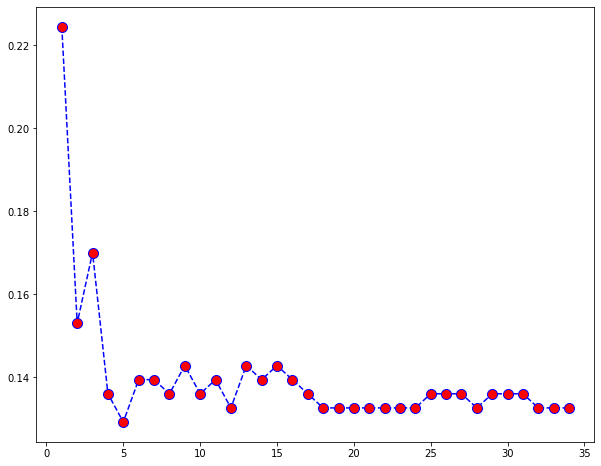

In [ ]:
# Plot the error rate and K 
plt.figure(figsize=(10, 8))
plt.plot(range(1, 35), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10);

Looking at the plot it seems like we already have the right K for our KNN classifier.

Comparing our 2 models they are giving the same output and one is not better than the other at a first glance.


## PyTorch

PyTorch is an open source deep learning framework. It provides a Python package for high-level features like tensor computation (like NumPy) with strong GPU acceleration.

### **Activation functions**
Non-linearity to the linear output. Helps the network use the important information and suppress the irrelevant data points.

We use activation functions in the hidden layer as well as the output layer.


##### **ReLU (Rectified linear unit)**
Non-linearity to the linear output. Output will be x if it is positive, negative values will be converted to 0.<br>
Matematical expression: `A(x) = max(0,x)`


In [136]:
# Import PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
#from torch.utils.data import Dataset, DataLoader

# Features and target to arrays
features_torch = df_concat.iloc[:, 1:df_concat.shape[1]].values
target_torch = df_concat.iloc[:, 0].values

# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(features_torch, target_torch, test_size=0.20, random_state=0)

In [137]:
# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#### Create our model

In [138]:
class ANN_Model(nn.Module):
  def __init__(self, input_features=25, hidden1=20, hidden2=20, output=2):
    super().__init__()
    self.fc1 = nn.Linear(input_features, hidden1)
    self.fc2 = nn.Linear(hidden1, hidden2)
    self.output = nn.Linear(hidden2, output)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.output(x)

    return x

#### Set our model

In [139]:
# Set the seed of the random number generator to a fixed value
torch.manual_seed(20)

# Instantiate model
ann_model = ANN_Model()

In [140]:
# Model parameters
ann_model.parameters

<bound method Module.parameters of ANN_Model(
  (fc1): Linear(in_features=25, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=2, bias=True)
)>

#### Loss function and optimizer

In [141]:
# Comparing predicted value to y-value
loss_function = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(ann_model.parameters(), lr=0.01)

#### Model training

In [142]:
epochs = 500

# Store losses
losses = []

for i in range(epochs):
  
  # Feedforward
  y_pred = ann_model.forward(X_train)

  # Calculate loss
  loss = loss_function(y_pred, y_train)
  losses.append(loss)

  # Print every 10 epoch
  if i%10==1:
    print('Epoch {}: train loss: {}'.format(i-1, loss.item()))

  # Reduce loss
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0: train loss: 0.5884421467781067
Epoch 10: train loss: 0.4319330155849457
Epoch 20: train loss: 0.4106155037879944
Epoch 30: train loss: 0.3990304470062256
Epoch 40: train loss: 0.387857049703598
Epoch 50: train loss: 0.376865029335022
Epoch 60: train loss: 0.3659222424030304
Epoch 70: train loss: 0.3557947278022766
Epoch 80: train loss: 0.3474240005016327
Epoch 90: train loss: 0.3395010828971863
Epoch 100: train loss: 0.334743857383728
Epoch 110: train loss: 0.3320009112358093
Epoch 120: train loss: 0.32132861018180847
Epoch 130: train loss: 0.3152037262916565
Epoch 140: train loss: 0.3162335753440857
Epoch 150: train loss: 0.3094227612018585
Epoch 160: train loss: 0.30143991112709045
Epoch 170: train loss: 0.30465880036354065
Epoch 180: train loss: 0.2959979176521301
Epoch 190: train loss: 0.2885368764400482
Epoch 200: train loss: 0.3230023682117462
Epoch 210: train loss: 0.2844941318035126
Epoch 220: train loss: 0.2810313403606415
Epoch 230: train loss: 0.28332892060279846
Ep

#### Prediction

In [143]:
# List to append predictions
predictions = []

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_pred = ann_model(data)
    predictions.append(y_pred.argmax().item())

In [144]:
# Confusion matrix
cf = confusion_matrix(predictions,y_test)
cf

array([[229,  38],
       [ 16,  11]])

In [145]:
acc_pt = accuracy_score(predictions,y_test)
print("Accuracy score: ", acc_pt)

Accuracy score:  0.8163265306122449


#### Test our applicant throught the model

In [146]:
# Convert to tensor
app = torch.from_numpy(new_applicant).type(torch.FloatTensor)

with torch.no_grad():
  value = ann_model(app).argmax().item()
  if(value == 0):
    print(f'This person seems to be a good fit for the company\nOutput: {value}')
  else:
    print(f'This person might not be a good fit for the company.\nOutput: {value}')

This person seems to be a good fit for the company
Output: 0


#### Comparing accuracy between our models

In [147]:
# Random Forest
print(f'Random Forest Accuracy: {int(round(rf_acc*100))}%')

# KNN
print(f'KNN Accuracy: {int(round(acc*100))}%')

# PyTorch
print(f'PyTorch Accuracy: {int(round(acc_pt*100))}%')

Random Forest Accuracy: 87%
KNN Accuracy: 87%
PyTorch Accuracy: 82%
